In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [29]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
data = pd.read_csv("./../data/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
data["emotion"].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [4]:
data["Usage"].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [5]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [6]:
def plot_data(data, classes):
  
  values = data["emotion"].value_counts().sort_index(ascending=True)
  colors = ["lightgreen", "blue", "lightblue", "pink", "orange", "yellow", "purple"]

  plt.figure(figsize=[12, 5])
  
  plt.bar(x=classes, height=values, color=colors, edgecolor='black')

  plt.xlabel("Emotions")
  plt.ylabel("Amount")
  plt.title("Amount of emotions")
  plt.show();

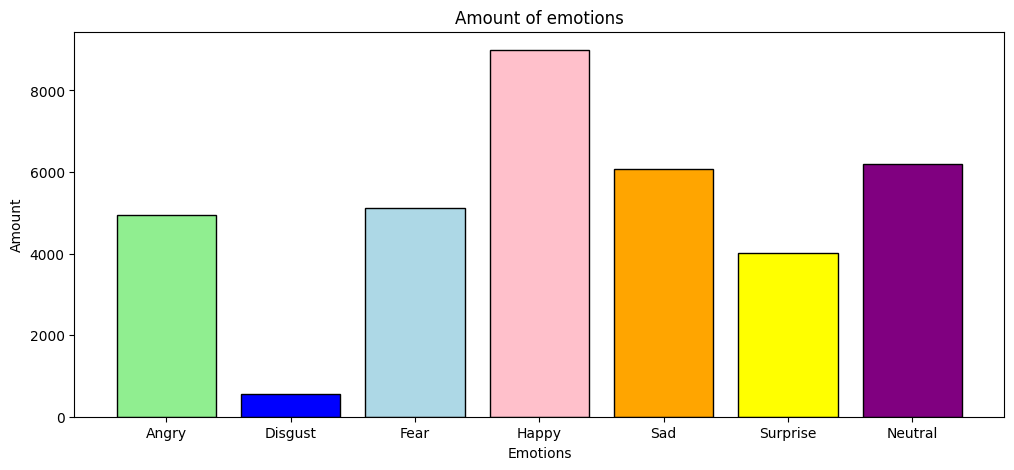

In [7]:
plot_data(data, class_names)

In [9]:
data.isna().value_counts()

emotion  pixels  Usage
False    False   False    35887
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [11]:
data = data[data["emotion"] != 1]
data = data[data["emotion"] != 2]
data = data[data["emotion"] != 6]
data["emotion"].value_counts().reset_index(drop=True, inplace=True)

In [12]:
data[:10]

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
10,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
14,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
15,5,107 107 109 109 109 109 110 101 123 140 144 14...,Training
16,3,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training


In [13]:
# Split data into X & y
X = data.drop("emotion", axis=1)
y = data["emotion"]

# Concat train sets into one
df = pd.concat([X, y], axis=1)

In [14]:
df["emotion"].value_counts()

emotion
3    8989
4    6077
0    4953
5    4002
Name: count, dtype: int64

In [15]:
# A few functions to help us process our pixels
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data.to_list(),(data.shape[0],48,48,1))
    image = np.repeat(image, 3, -1)
    return image

In [16]:
df['pixels'] = df["pixels"].apply(pixels_to_array)

In [17]:
data_train = df[df["Usage"] == "Training"]
data_test1 = df[df["Usage"] == "PublicTest"]
data_test2 = df[df["Usage"] == "PrivateTest"]
data_test = pd.concat([data_test1, data_test2])

In [18]:
X_train = image_reshape(data_train["pixels"])
X_test = image_reshape(data_test["pixels"])
y_train = data_train["emotion"]
y_test = data_test["emotion"]

In [20]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [21]:
for i in range(len(y_train)):
  if y_train[i] == 3:
    y_train[i] = 1
  elif y_train[i] == 4:
    y_train[i] = 2
  elif y_train[i] == 5:
    y_train[i] = 3

for i in range(len(y_test)):
  if y_test[i] == 3:
    y_test[i] = 1
  elif y_test[i] == 4:
    y_test[i] = 2
  elif y_test[i] == 5:
    y_test[i] = 3

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 3
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 3
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 3
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 2
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 3
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 3
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = 1
C:\Users\Eiji\AppData\Local\Temp\ipykernel_16656\686747994.py

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
import cv2
import os

def put_in_dir(X_train, X_test, y_train, y_test, classes):
  """
  Takes data and dir to put images in directory.

  Args:

    data (np.array): Images
    dir (str): Directory to put images

  Returns:
    Images in the specified directory;

  """
  for label in range(len(classes)):
    os.makedirs("./../data/train/" + classes[label], exist_ok=True)
    os.makedirs("./../data/test/" + classes[label], exist_ok=True)

  for i in range(len(X_train)):
    emotion = classes[y_train[i]]
    cv2.imwrite(f"./../data/train/{emotion}/{emotion}{i}.png", X_train[i])

  for j in range(len(X_test)):
    emotion = classes[y_test[j]]
    cv2.imwrite(f"./../data/test/{emotion}/{emotion}{j}.png", X_test[j])

In [23]:
class_names = ["Angry", "Happy", "Sad", "Surprise"]

In [24]:
put_in_dir(X_train, X_test, y_train, y_test, class_names)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (48, 48)
BATCH_SIZE = 64

train_dir = "./../data/train/"
test_dir =  "./../data/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 19211 images belonging to 4 classes.
Found 4810 images belonging to 4 classes.


In [27]:
# Import packages 
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [30]:
# class_names = ["Angry", "Happy", "Sad", "Surprise"]

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(1024, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=60, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/60
301/301 [==============================] - ETA: 0s - loss: 1.5410 - accuracy: 0.3560
Epoch 1: val_loss improved from inf to 1.43905, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 519s 1s/step - loss: 1.5410 - accuracy: 0.3560 - val_loss: 1.4391 - val_accuracy: 0.3651 - lr: 0.0010
Epoch 2/60
301/301 [==============================] - ETA: 0s - loss: 1.2398 - accuracy: 0.4358
Epoch 2: val_loss improved from 1.43905 to 1.21657, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 283s 940ms/step - loss: 1.2398 - accuracy: 0.4358 - val_loss: 1.2166 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 3/60
301/301 [==============================] - ETA: 0s - loss: 1.1353 - accuracy: 0.4969
Epoch 3: val_loss improved from 1.21657 to 1.21021, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 283s 941ms/step - loss: 1.1353 - accuracy: 0.4969 - val_loss: 1.2102 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 4/60
301/301 [==============================] - ETA: 0s - loss: 1.0484 - accuracy: 0.5441
Epoch 4: val_loss did not improve from 1.21021
301/301 [==============================] - 281s 934ms/step - loss: 1.0484 - accuracy: 0.5441 - val_loss: 1.3174 - val_accuracy: 0.3653 - lr: 0.0010
Epoch 5/60
301/301 [==============================] - ETA: 0s - loss: 0.9591 - accuracy: 0.5948
Epoch 5: val_loss improved from 1.21021 to 1.13408, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 282s 938ms/step - loss: 0.9591 - accuracy: 0.5948 - val_loss: 1.1341 - val_accuracy: 0.5289 - lr: 0.0010
Epoch 6/60
301/301 [==============================] - ETA: 0s - loss: 0.9165 - accuracy: 0.6143
Epoch 6: val_loss improved from 1.13408 to 1.00298, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 283s 938ms/step - loss: 0.9165 - accuracy: 0.6143 - val_loss: 1.0030 - val_accuracy: 0.6012 - lr: 0.0010
Epoch 7/60
301/301 [==============================] - ETA: 0s - loss: 0.8714 - accuracy: 0.6354
Epoch 7: val_loss improved from 1.00298 to 0.81105, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 283s 941ms/step - loss: 0.8714 - accuracy: 0.6354 - val_loss: 0.8110 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 8/60
301/301 [==============================] - ETA: 0s - loss: 0.8379 - accuracy: 0.6572
Epoch 8: val_loss improved from 0.81105 to 0.79117, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 283s 940ms/step - loss: 0.8379 - accuracy: 0.6572 - val_loss: 0.7912 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 9/60
301/301 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.6614
Epoch 9: val_loss did not improve from 0.79117
301/301 [==============================] - 282s 936ms/step - loss: 0.8196 - accuracy: 0.6614 - val_loss: 0.8072 - val_accuracy: 0.6886 - lr: 0.0010
Epoch 10/60
301/301 [==============================] - ETA: 0s - loss: 0.8017 - accuracy: 0.6732
Epoch 10: val_loss improved from 0.79117 to 0.75461, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 282s 937ms/step - loss: 0.8017 - accuracy: 0.6732 - val_loss: 0.7546 - val_accuracy: 0.6985 - lr: 0.0010
Epoch 11/60
301/301 [==============================] - ETA: 0s - loss: 0.7908 - accuracy: 0.6790
Epoch 11: val_loss did not improve from 0.75461
301/301 [==============================] - 282s 936ms/step - loss: 0.7908 - accuracy: 0.6790 - val_loss: 0.7668 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 12/60
301/301 [==============================] - ETA: 0s - loss: 0.7632 - accuracy: 0.6935
Epoch 12: val_loss did not improve from 0.75461
301/301 [==============================] - 317s 1s/step - loss: 0.7632 - accuracy: 0.6935 - val_loss: 0.7804 - val_accuracy: 0.6877 - lr: 0.0010
Epoch 13/60
301/301 [==============================] - ETA: 0s - loss: 0.7499 - accuracy: 0.6980
Epoch 13: val_loss did not improve from 0.75461
301/301 [==============================] - 315s 1s/step - loss: 0.7499 - accuracy: 0.6980 - val_loss: 0.7637 - val_accuracy:

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 394s 1s/step - loss: 0.7253 - accuracy: 0.7062 - val_loss: 0.6771 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 16/60
301/301 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.7132
Epoch 16: val_loss did not improve from 0.67710
301/301 [==============================] - 398s 1s/step - loss: 0.7155 - accuracy: 0.7132 - val_loss: 0.7154 - val_accuracy: 0.7191 - lr: 0.0010
Epoch 17/60
301/301 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.7183
Epoch 17: val_loss did not improve from 0.67710
301/301 [==============================] - 389s 1s/step - loss: 0.6965 - accuracy: 0.7183 - val_loss: 0.7794 - val_accuracy: 0.6911 - lr: 0.0010
Epoch 18/60
301/301 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.7258
Epoch 18: val_loss improved from 0.67710 to 0.67406, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 399s 1s/step - loss: 0.6841 - accuracy: 0.7258 - val_loss: 0.6741 - val_accuracy: 0.7366 - lr: 0.0010
Epoch 19/60
301/301 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.7313
Epoch 19: val_loss improved from 0.67406 to 0.64100, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 399s 1s/step - loss: 0.6746 - accuracy: 0.7313 - val_loss: 0.6410 - val_accuracy: 0.7505 - lr: 0.0010
Epoch 20/60
301/301 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.7327
Epoch 20: val_loss improved from 0.64100 to 0.62934, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 398s 1s/step - loss: 0.6620 - accuracy: 0.7327 - val_loss: 0.6293 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 21/60
301/301 [==============================] - ETA: 0s - loss: 0.6553 - accuracy: 0.7356
Epoch 21: val_loss did not improve from 0.62934
301/301 [==============================] - 384s 1s/step - loss: 0.6553 - accuracy: 0.7356 - val_loss: 0.6910 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 22/60
301/301 [==============================] - ETA: 0s - loss: 0.6352 - accuracy: 0.7489
Epoch 22: val_loss did not improve from 0.62934
301/301 [==============================] - 389s 1s/step - loss: 0.6352 - accuracy: 0.7489 - val_loss: 0.6520 - val_accuracy: 0.7520 - lr: 0.0010
Epoch 23/60
301/301 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.7494
Epoch 23: val_loss did not improve from 0.62934
301/301 [==============================] - 385s 1s/step - loss: 0.6331 - accuracy: 0.7494 - val_loss: 0.6890 - val_accuracy: 0.739

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 382s 1s/step - loss: 0.5844 - accuracy: 0.7672 - val_loss: 0.6071 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 29/60
301/301 [==============================] - ETA: 0s - loss: 0.5869 - accuracy: 0.7695
Epoch 29: val_loss did not improve from 0.60707
301/301 [==============================] - 383s 1s/step - loss: 0.5869 - accuracy: 0.7695 - val_loss: 0.6152 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 30/60
301/301 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7739
Epoch 30: val_loss did not improve from 0.60707
301/301 [==============================] - 388s 1s/step - loss: 0.5708 - accuracy: 0.7739 - val_loss: 0.6289 - val_accuracy: 0.7628 - lr: 0.0010
Epoch 31/60
301/301 [==============================] - ETA: 0s - loss: 0.5634 - accuracy: 0.7778
Epoch 31: val_loss did not improve from 0.60707
301/301 [==============================] - 396s 1s/step - loss: 0.5634 - accuracy: 0.7778 - val_loss: 0.7688 - val_accuracy: 0.687

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 331s 1s/step - loss: 0.5410 - accuracy: 0.7848 - val_loss: 0.5947 - val_accuracy: 0.7723 - lr: 0.0010
Epoch 34/60
301/301 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.7895
Epoch 34: val_loss improved from 0.59470 to 0.58957, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 329s 1s/step - loss: 0.5365 - accuracy: 0.7895 - val_loss: 0.5896 - val_accuracy: 0.7773 - lr: 0.0010
Epoch 35/60
301/301 [==============================] - ETA: 0s - loss: 0.5283 - accuracy: 0.7926
Epoch 35: val_loss did not improve from 0.58957
301/301 [==============================] - 327s 1s/step - loss: 0.5283 - accuracy: 0.7926 - val_loss: 0.5927 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 36/60
301/301 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.7966
Epoch 36: val_loss did not improve from 0.58957
301/301 [==============================] - 283s 939ms/step - loss: 0.5212 - accuracy: 0.7966 - val_loss: 0.6245 - val_accuracy: 0.7599 - lr: 0.0010
Epoch 37/60
301/301 [==============================] - ETA: 0s - loss: 0.5184 - accuracy: 0.7954
Epoch 37: val_loss improved from 0.58957 to 0.58108, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 273s 908ms/step - loss: 0.5184 - accuracy: 0.7954 - val_loss: 0.5811 - val_accuracy: 0.7761 - lr: 0.0010
Epoch 38/60
301/301 [==============================] - ETA: 0s - loss: 0.5080 - accuracy: 0.8034
Epoch 38: val_loss did not improve from 0.58108
301/301 [==============================] - 272s 903ms/step - loss: 0.5080 - accuracy: 0.8034 - val_loss: 0.6143 - val_accuracy: 0.7690 - lr: 0.0010
Epoch 39/60
301/301 [==============================] - ETA: 0s - loss: 0.5081 - accuracy: 0.8022
Epoch 39: val_loss did not improve from 0.58108
301/301 [==============================] - 272s 904ms/step - loss: 0.5081 - accuracy: 0.8022 - val_loss: 0.5967 - val_accuracy: 0.7761 - lr: 0.0010
Epoch 40/60
301/301 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8067
Epoch 40: val_loss did not improve from 0.58108
301/301 [==============================] - 272s 903ms/step - loss: 0.4944 - accuracy: 0.8067 - val_loss: 0.7075 - val_acc

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 273s 908ms/step - loss: 0.4575 - accuracy: 0.8218 - val_loss: 0.5630 - val_accuracy: 0.7896 - lr: 0.0010
Epoch 47/60
301/301 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.8267
Epoch 47: val_loss did not improve from 0.56299
301/301 [==============================] - 272s 903ms/step - loss: 0.4444 - accuracy: 0.8267 - val_loss: 0.6047 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 48/60
301/301 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.8318
Epoch 48: val_loss did not improve from 0.56299
301/301 [==============================] - 272s 903ms/step - loss: 0.4363 - accuracy: 0.8318 - val_loss: 0.5935 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 49/60
301/301 [==============================] - ETA: 0s - loss: 0.4292 - accuracy: 0.8325
Epoch 49: val_loss did not improve from 0.56299
301/301 [==============================] - 272s 903ms/step - loss: 0.4292 - accuracy: 0.8325 - val_loss: 0.5876 - val_acc

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


301/301 [==============================] - 273s 908ms/step - loss: 0.3247 - accuracy: 0.8752 - val_loss: 0.5601 - val_accuracy: 0.8040 - lr: 2.0000e-04
Epoch 58/60
301/301 [==============================] - ETA: 0s - loss: 0.3119 - accuracy: 0.8806
Epoch 58: val_loss did not improve from 0.56013
301/301 [==============================] - 271s 901ms/step - loss: 0.3119 - accuracy: 0.8806 - val_loss: 0.5766 - val_accuracy: 0.8027 - lr: 2.0000e-04
Epoch 59/60
301/301 [==============================] - ETA: 0s - loss: 0.3123 - accuracy: 0.8829
Epoch 59: val_loss did not improve from 0.56013
301/301 [==============================] - 271s 901ms/step - loss: 0.3123 - accuracy: 0.8829 - val_loss: 0.5659 - val_accuracy: 0.7975 - lr: 2.0000e-04
Epoch 60/60
301/301 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.8873
Epoch 60: val_loss did not improve from 0.56013
301/301 [==============================] - 271s 901ms/step - loss: 0.2972 - accuracy: 0.8873 - val_loss: 0.58

In [31]:
model_1.save("./../model.h5")
model_1.save("model.h5")